In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy import stats
from scipy.stats import zscore
from sklearn.preprocessing import MinMaxScaler

data = pd.read_csv('diabetic_data.csv') 

In [2]:
data.shape

(101766, 50)

In [3]:
data.isnull().sum()

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
weight                      0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazo

In [4]:
data = data.replace('?', np.nan)

In [5]:
def convert_readmission(value):
  if value == '<30':
    return 1
  else:
    return 0

data['readmitted'] = data['readmitted'].apply(convert_readmission)

In [6]:
count_ones = data['readmitted'].sum()
print(count_ones)

11357


In [7]:
data['readmitted'] = data['readmitted'].astype(bool)
print(data.dtypes)

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride         

In [8]:
missing_percentages = data.isnull().sum() / len(data) * 100
columns_to_drop = missing_percentages[missing_percentages > 90].index
data = data.drop(columns_to_drop, axis=1)

In [9]:
no_variation_cols = ['examide', 'citoglipton']


# Drop all columns 
data = data.drop(no_variation_cols, axis=1) 
near_zero_variance_cols = ['repaglinide', 'nateglinide', 'chlorpropamide', 
                           'glimepiride', 'acetohexamide', 'tolbutamide', 
                           'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 
                            'glyburide-metformin', 
                           'glipizide-metformin', 'glimepiride-pioglitazone', 
                           'metformin-rosiglitazone', 'metformin-pioglitazone']

data = data.drop(near_zero_variance_cols, axis=1) 

In [10]:
columns_to_convert = ['admission_type_id', 'discharge_disposition_id', 'admission_source_id']

# Convert the specified columns to strings
data[columns_to_convert] = data[columns_to_convert].astype(str)

print(data.dtypes)

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
admission_type_id           object
discharge_disposition_id    object
admission_source_id         object
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
glipizide                   object
glyburide                   object
pioglitazone                object
rosiglitazone               object
insulin             

In [11]:
data.dropna(inplace=True)

In [12]:
data.shape

(26755, 32)

In [13]:
data = data.drop('encounter_id', axis=1)

In [14]:
data.isna().mean().sort_values(ascending=False).head()

readmitted          0.0
number_emergency    0.0
race                0.0
gender              0.0
age                 0.0
dtype: float64

In [15]:
features = ['time_in_hospital', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'number_diagnoses']


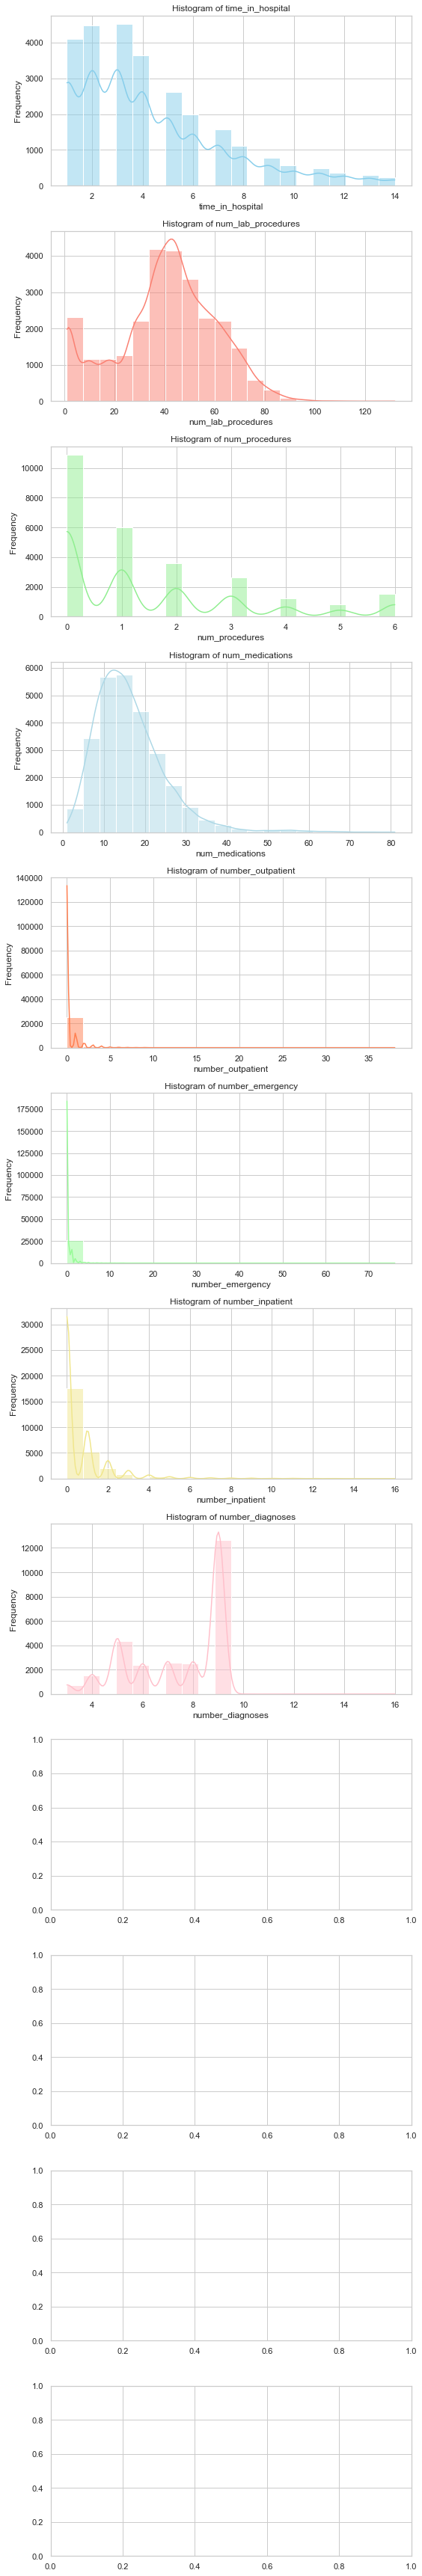

In [20]:
sns.set(style="whitegrid")

# Create a figure and axis to plot histograms for multiple features
fig, axs = plt.subplots(12, 1, figsize=(8, 48))  # Adjusted for the number of variables

# List of features to plot
features = [
    'time_in_hospital', 'num_lab_procedures', 'num_procedures',
    'num_medications', 'number_outpatient', 'number_emergency',
    'number_inpatient', 'number_diagnoses'
]

# Colors for the plots
colors = [
    'skyblue', 'salmon', 'lightgreen', 'lightblue', 'coral', 'palegreen',
    'khaki', 'pink', 'lightgrey', 'cyan', 'peachpuff', 'lavender'
]

# Loop through features and create histograms
for i, feature in enumerate(features):
    sns.histplot(data=data, x=feature, bins=20, kde=True, color=colors[i], ax=axs[i])
    axs[i].set_title(f'Histogram of {feature}')
    axs[i].set_xlabel(f'{feature}')
    axs[i].set_ylabel('Frequency')

# Adjust layout and show plot
plt.tight_layout()
plt.show()

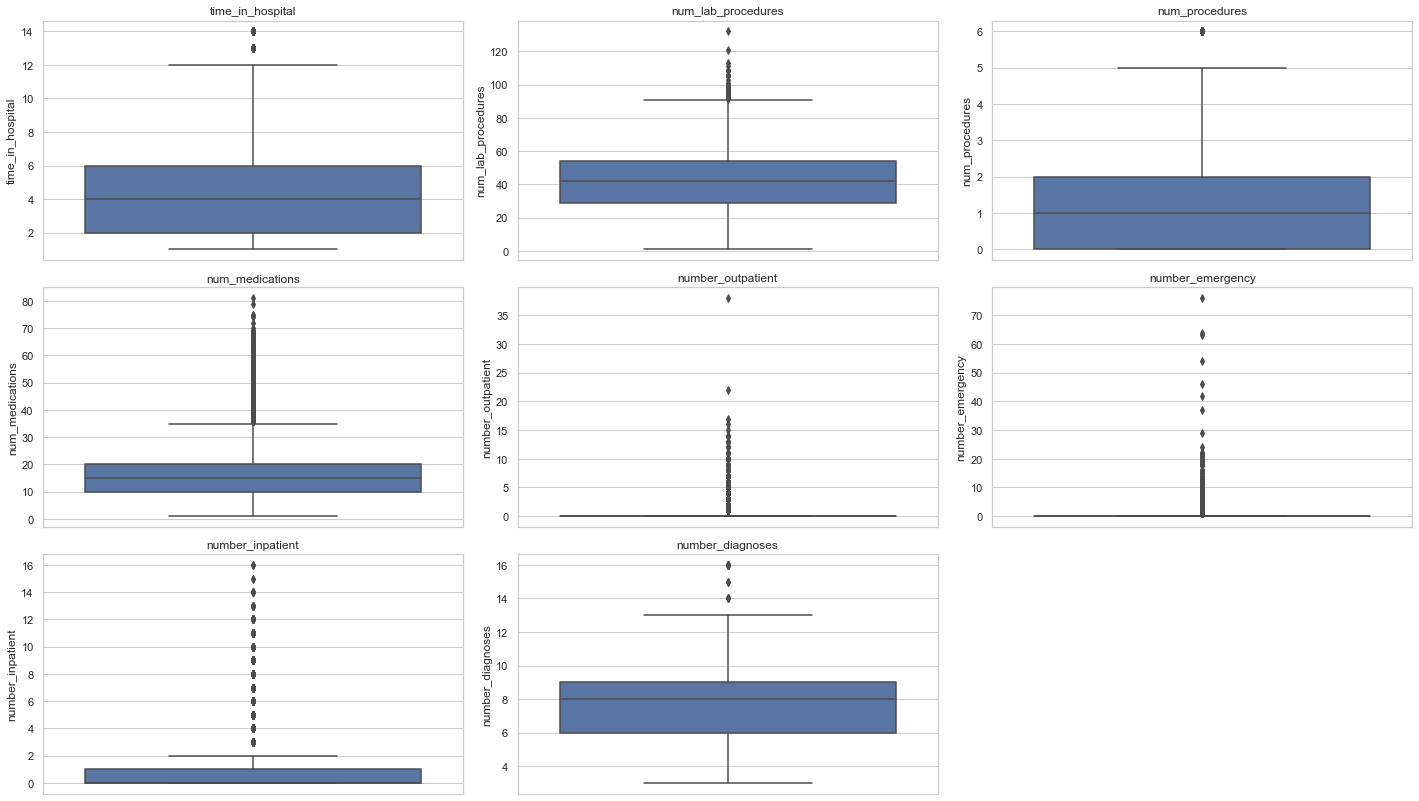

In [29]:
features_boxplot = ['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 
                    'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']

# Plotting the boxplots for each feature separately
plt.figure(figsize=(20, 15))
for i, feature in enumerate(features_boxplot, start=1):
    plt.subplot(4, 3, i)  # Adjust the grid size according to the number of features
    sns.boxplot(y=data[feature])
    plt.title(feature)

plt.tight_layout()  # Adjust the layout to not overlap the plots
plt.show()

In [21]:
# List of features to apply Z-score method
z_score_features = ['num_lab_procedures', 'num_medications' ]  # Assuming normal distribution

# List of features to apply IQR method
iqr_features = ['time_in_hospital', 'num_procedures', 'number_outpatient', 'number_emergency', 'number_inpatient','number_diagnoses']


In [26]:
diabetic_data_outliers_handled = data.copy()
# Apply Z-score method for assumed normal distribution features
for feature in z_score_features:
    z_scores = np.abs(stats.zscore(diabetic_data_outliers_handled[feature]))
    filtered_entries = (z_scores < 3)  # Filtering out data points that are more than 3 standard deviations away
    diabetic_data_outliers_handled = diabetic_data_outliers_handled[filtered_entries]

# Apply IQR method for skewed distribution features
for feature in iqr_features:
    Q1 = diabetic_data_outliers_handled[feature].quantile(0.25)
    Q3 = diabetic_data_outliers_handled[feature].quantile(0.75)
    IQR = Q3 - Q1
    filtered_entries = ((diabetic_data_outliers_handled[feature] >= (Q1 - 1.5 * IQR)) & 
                        (diabetic_data_outliers_handled[feature] <= (Q3 + 1.5 * IQR)))
    diabetic_data_outliers_handled = diabetic_data_outliers_handled[filtered_entries]

# Calculate the final size of the dataset after outlier handling
final_data_size_outliers_handled = len(diabetic_data_outliers_handled) / len(data) * 100

final_data_size_outliers_handled

65.37843393758176

In [27]:
diabetic_data_outliers_handled.shape

(17492, 31)

In [31]:
f_cleaned = diabetic_data_outliers_handled.copy()  
# Features to be normalized
features_normalize = ['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 
                      'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the features using .loc for proper setting
diabetic_data_outliers_handled.loc[:, features_normalize] = scaler.fit_transform(diabetic_data_outliers_handled[features_normalize])

# Now df_cleaned should be modified without affecting the original and without warning
print(diabetic_data_outliers_handled[features_normalize].head())

       time_in_hospital  num_lab_procedures  num_procedures  num_medications  \
20446          0.545455            0.575758             0.4         0.341463   
20737          0.181818            0.585859             0.6         0.243902   
20824          0.272727            0.555556             0.2         0.195122   
21083          0.818182            0.676768             0.2         0.414634   
23879          1.000000            0.767677             1.0         0.439024   

       number_outpatient  number_emergency  number_inpatient  number_diagnoses  
20446                0.0               0.0               0.0          0.500000  
20737                0.0               0.0               0.0          0.250000  
20824                0.0               0.0               0.0          0.250000  
21083                0.0               0.0               0.0          0.250000  
23879                0.0               0.0               0.0          0.166667  


In [32]:
diabetic_data_outliers_handled.shape

(17492, 31)

In [33]:
output_file_path = "DataCleaning_Part1Ams"

# Save the cleaned data to a new CSV file
f_cleaned.to_csv(output_file_path, index=False)

print("Cleaned data has been saved to:", output_file_path)

Cleaned data has been saved to: DataCleaning_Part1Ams
